In [1]:
!pip install -U numpy pandas plotnine
!apt-get install tree
!mkdir -p ./math131/data
!mkdir -p ./math131/week04
!wget -q -P ./math131/data/ https://raw.githubusercontent.com/roualdes/data/master/bike.csv

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tree is already the newest version (2.0.2-1).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


# Week 04 Notes

## Graphing Details


In this section, we cover some details about customizing a plotnine plot.  This
lesson will not explore all available options, nor are you expected to memorize
all the details we cover.  This lesson is intended to be an introduction to the
types of things you can easily change on a plotnine plot.  For details and/or
reference material on computer software, you should consult the [plotnine
documentation](https://plotnine.readthedocs.io/en/stable/api.html).

Let's continue developing the plot we started at the end of [Week
03](https://roualdes.github.io/MATH131/week-03.html#aggregating).  Our goal is to display information about the mean total
amount of sleep mamals (in our dataset) get, where the data are grouped by their
`vore` status.  This is a task for aggregating: group by `vore` and summarize `sleep_total` with the function `np.mean`.  Since the mean of any dataset is random, as part
of the random sampling of the data, we should also calculate and display the
error in our estimate associated with the mean.  That is, we should display a
confidence interval for the mean.

In [2]:
import numpy as np
import pandas as pd
import plotnine as pn

from plotnine.data import msleep

After loading the appropriate Python packages, we aggregate our dataset: group
by `vore` and calculate means, by groups, of the numeric variable `sleep_total`.
Since `vore` has some missing data, we'll drop rows of the DataFrame where
`vore` is missing.

In [3]:
df = msleep.dropna(subset = "vore")

odf = (df
    .groupby("vore", as_index = False)
    .aggregate( #like a function f(argument , keywords arguement , ...)
        mean = ("sleep_total", np.mean),
        sd = ("sleep_total", np.std),
        count = ("sleep_total", np.size)))

<ipython-input-3-18368323b484>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
<ipython-input-3-18368323b484>:3: FutureWarning: The provided callable <function mean at 0x7d66dd9731c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
<ipython-input-3-18368323b484>:3: FutureWarning: The provided callable <function std at 0x7d66dd9732e0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.


In [4]:
odf

,vore,mean,sd,count
0,carni,10.378947,4.669116,19
1,herbi,9.509375,4.878746,32
2,insecti,14.940000,5.920557,5
3,omni,10.925000,2.949019,20


Next, we'll calculate the lower and upper bound of the confidence interval.

In [5]:
odf["se"] = odf["sd"] / np.sqrt(odf["count"])
odf["ub"] = odf["mean"] + 1.96 * odf["se"]
odf["lb"] = odf["mean"] - 1.96 * odf["se"]

In [6]:
print(odf["se"])
print

0    1.071169
1    0.862449
2    2.647754
3    0.659421
Name: se, dtype: float64


<function print>

-------------------------•-------------------------

lower bound, mean, upper bond

* title

* labels

* other geoms: errorbar, jitter

* change tick labels

* re-consider bar charts

* multivariate plotting



Since plotnine plots are created by adding layers of information, let's get
started by creating the variable `p` to hold our plot as we build it up piece by
piece.  Below is the code we used from [Week 03](https://roualdes.github.io/MATH131/week-03.html#aggregating).

In [7]:
p = (pn.ggplot(data = odf)
    + pn.geom_point(pn.aes(x = odf["vore"].cat.codes, y = "mean"),
                    color = "blue", #inside ae s it changes the categorial variable, but when outside it changes all points
                    shape = "X",
                    size = 2.5))

The keyword arguments `color` and `shape`, when they appear inside a `geom_` layer and outside of `aes`, take just one color and one shape. Because plotnine is built on top of other Python packages, [matplotlib](https://matplotlib.org/stable/) specifically, finding the available colors and shapes can be tricky. Here are links to the [matplotlib named colors](https://roualdes.github.io/MATH131/week-04.html) and the [matplotlib available shapes](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers).

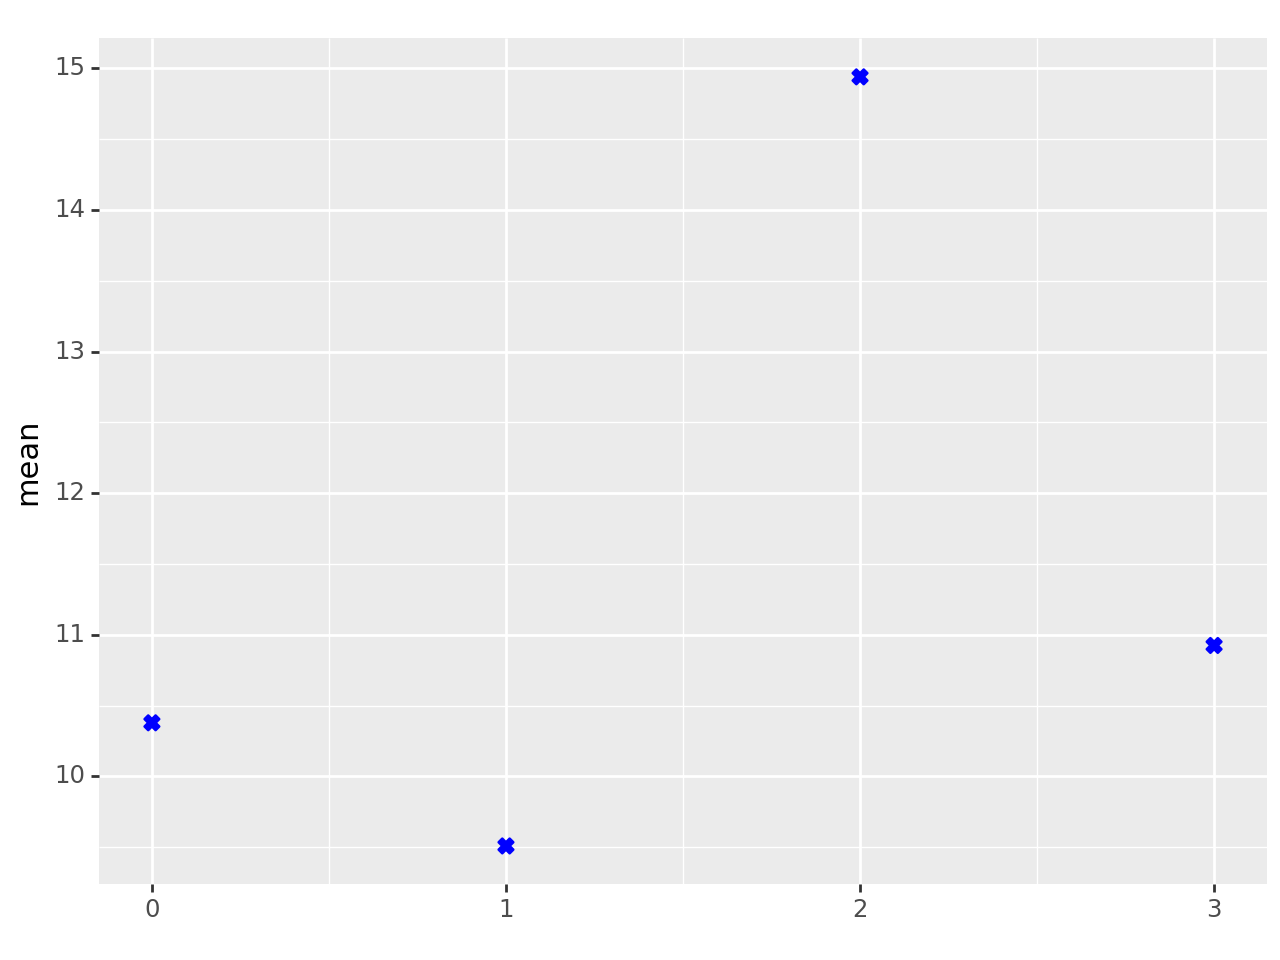

In [8]:
p.draw()

> So far, we have “X”s for means for each group. No confidence intervals, no group names (just numbers representing their group names), no original data, and no plot title. And maybe we want to change the axis labels. Let’s take each of these in turn. We leave it to the reader to display the plot after each update, if they so choose. We’ll show the complete plot only at the end of all of our updates.

Let's add the confidence interval, useing the `geom_errorbar` layer.

In [9]:
p += pn.geom_linerange(pn.aes(x = odf["vore"].cat.codes, ymin = "lb", ymax = "ub"), color = "blue")

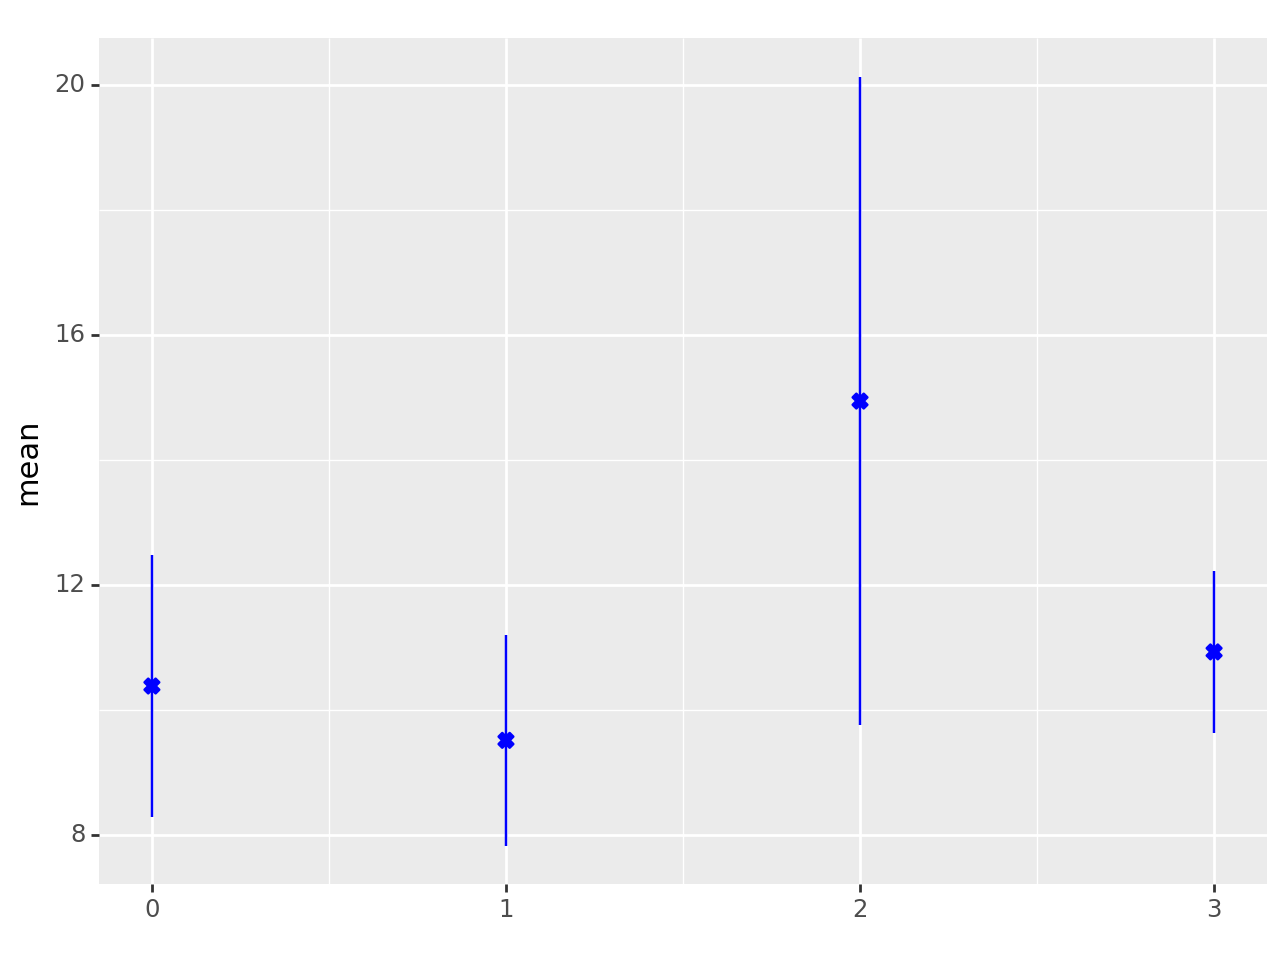

<Figure Size: (640 x 480)>

In [10]:
p

> The syntax `p += expression` is equivalent to `p = p + expression`. It certainly takes some time to get used to, but it also very convenient. For all of the layers we are interested in adding on to our plot `p`, we just want to update `p` to hold the latest version of our plot. There is no sense in keeping around the previous version of our plot.

Next, let's add the original data.  Putting the original data on a plot is
increasingly popular and always recommended.  It helps you and your reader
understand the variation in your data, and will often help explain why one (or
more) groups may appear different.

In [11]:
p += pn.geom_jitter(df,              # notice the change in dataset
    pn.aes(x = df["vore"].cat.codes, # unique numeric codes of the labels in vore
    y = "sleep_total",
    color = "vore"),
    width = 0.25,                    # the maximal width of horizontal noise/jitter
    alpha = 0.5
    )

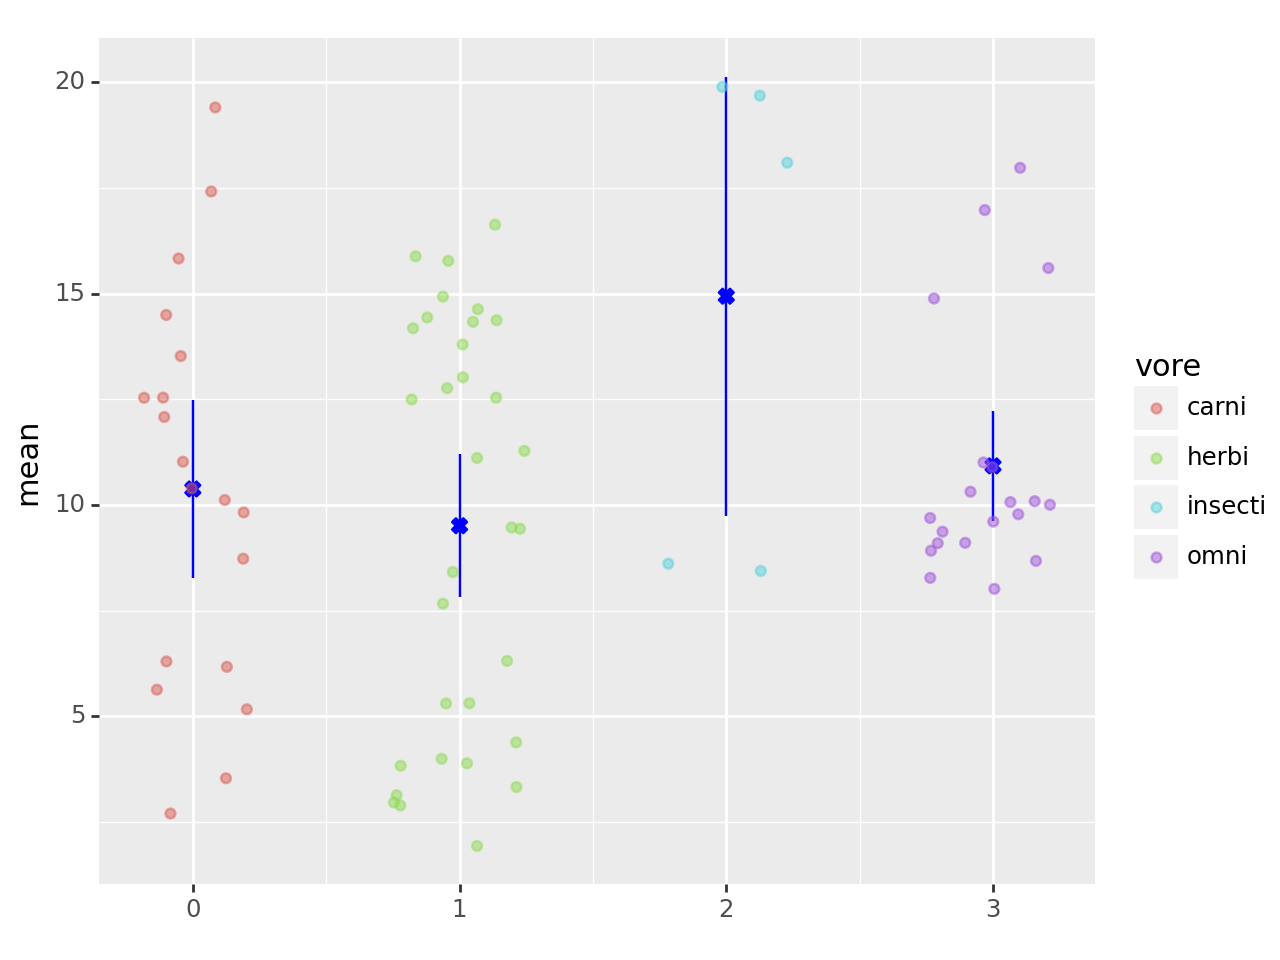

<Figure Size: (640 x 480)>

In [12]:
p

> The layer `geom_jitter` is like `geom_point` but adds a bit of horizontal noise/jitter in the x-axis. Since the x-axis of this plot is `vore` status, and not actually numbers adding horizontal noise doesn’t change the information in the data at all. For each category of `vore`, the numeric values on the y-axis is where the information in the data are contained.

> By specifying a categorical variable for the keyword argument `color` within `aes`, the jittered points will show up in unique colors for each category of the variable specified, `vore` in this case. Further, a legend will automatically be displayed. Changing the category names of the variable `vore` is best done by renaming the categories, as in [Week 02: Categorical variables](https://roualdes.github.io/MATH131/week-02.html#categorical-variables), but we can easily change the legend title from plotnine.

Change the legend title.

In [13]:
p += pn.guides(color = pn.guide_legend(title = "Vore status"))

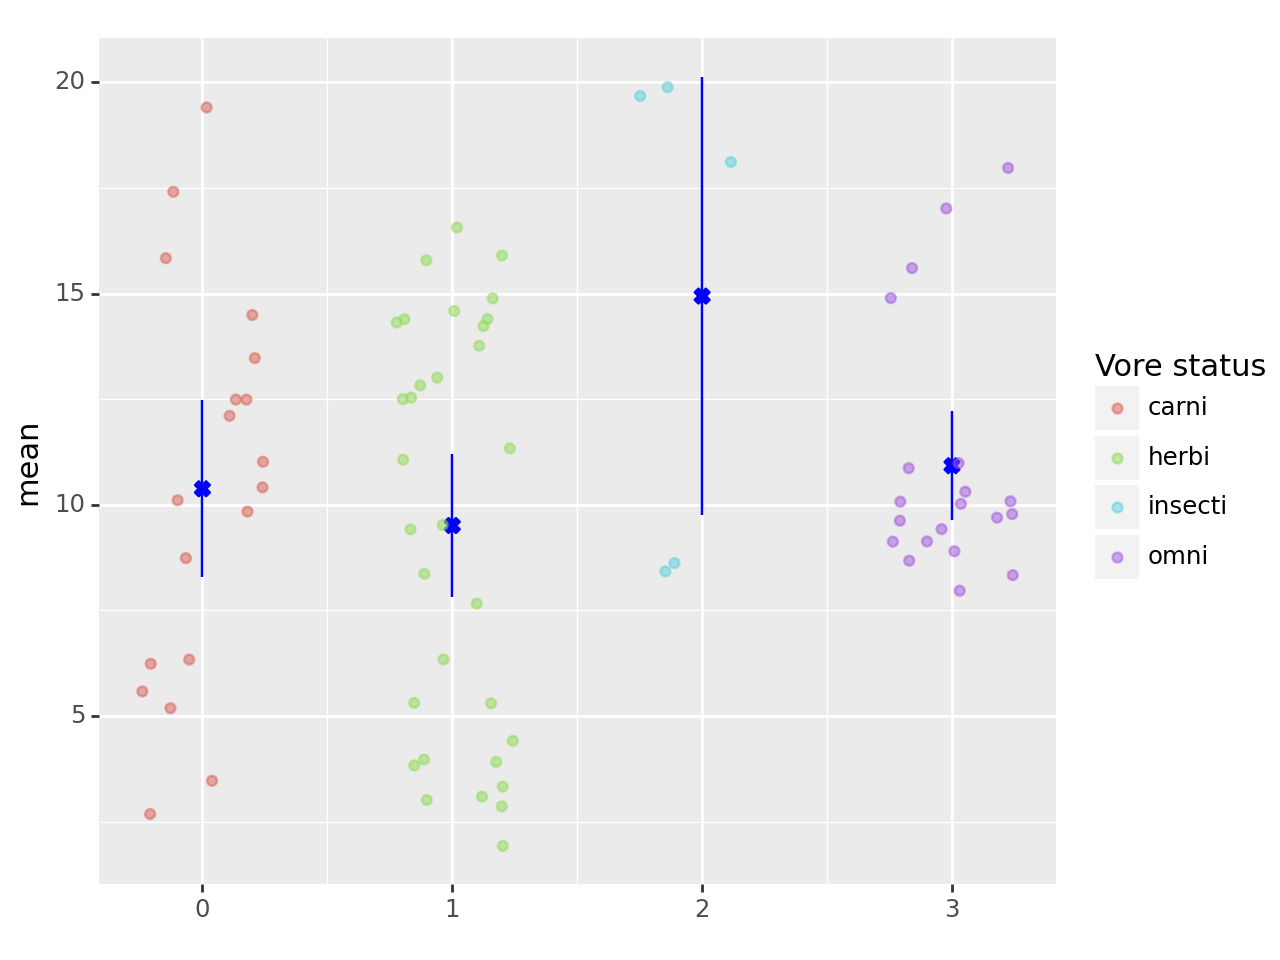

In [14]:
p.draw()

To remind your readers, and future-you, that the x-axis here is a categorical
variable, let's change the tick labels to better represent what information they
actually contain.

In [15]:
p += pn.scale_x_continuous(                  # continuous x-axis scale based on numeric codes of vore
    breaks = df["vore"].cat.codes.to_list(), # breaks dictate where on the x-axis, a list of numeric values
    labels = df["vore"].to_list()            # list of labels at breaks
)

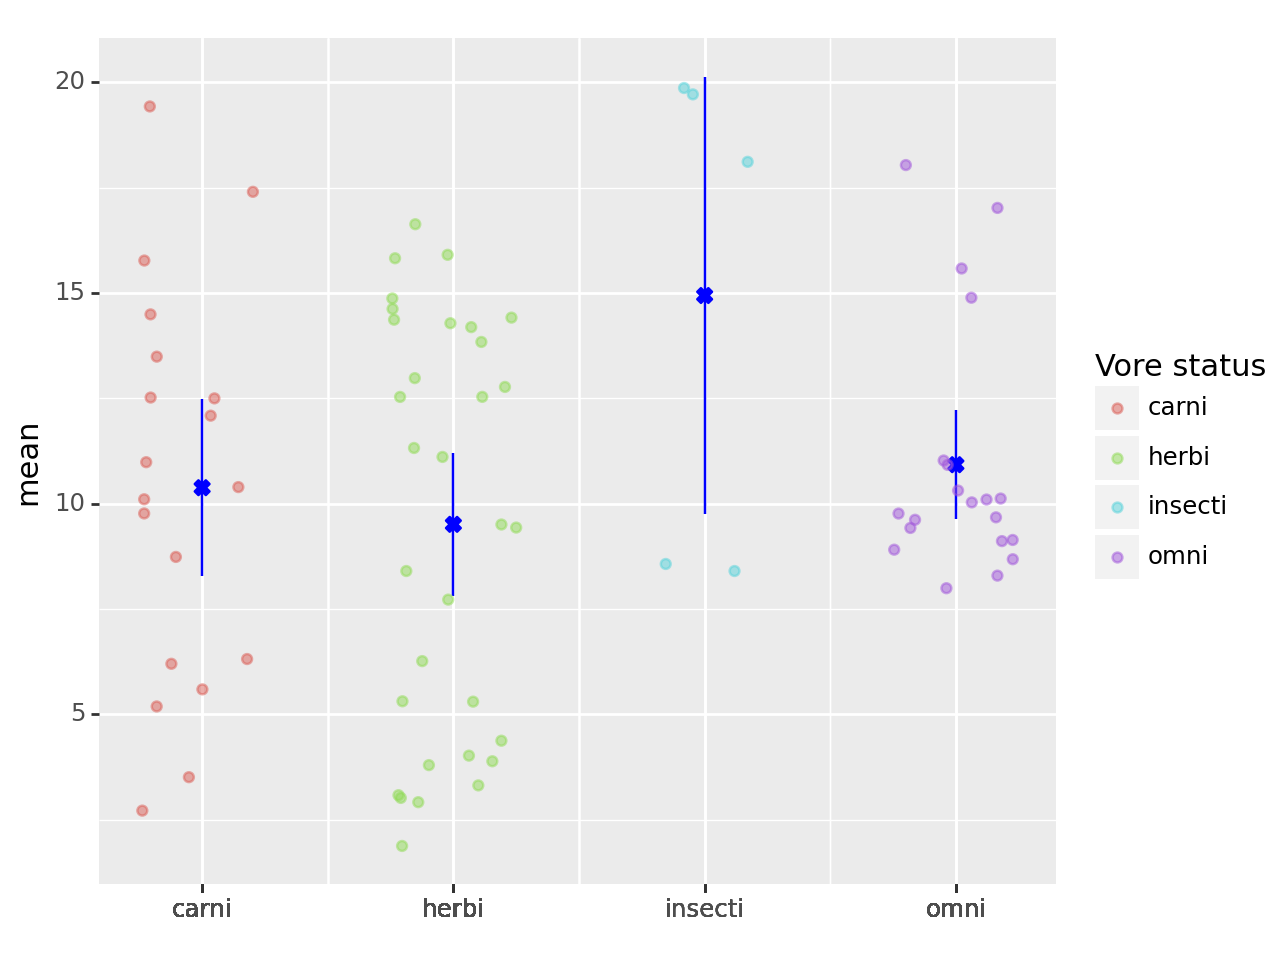

<Figure Size: (640 x 480)>

In [16]:
p

Next, let's change the axis labels and title.

In [17]:
p += pn.labs(
    x = "Vore status",
    y = "Sleep (hours)",
    title = "Hours of sleep by vore status"
)

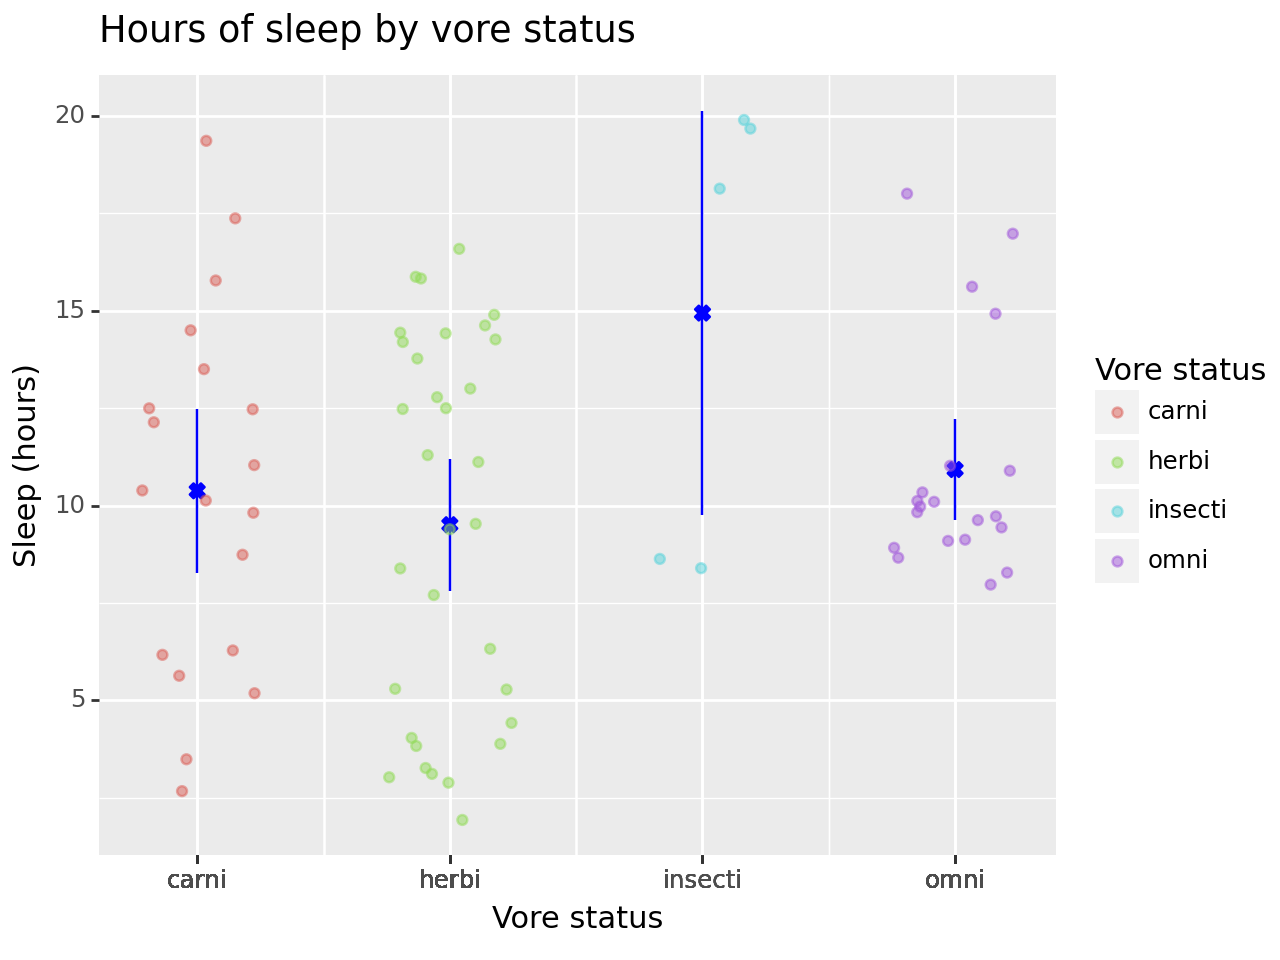

<Figure Size: (640 x 480)>

In [18]:
p

Last, let's change the plot theme and font size.

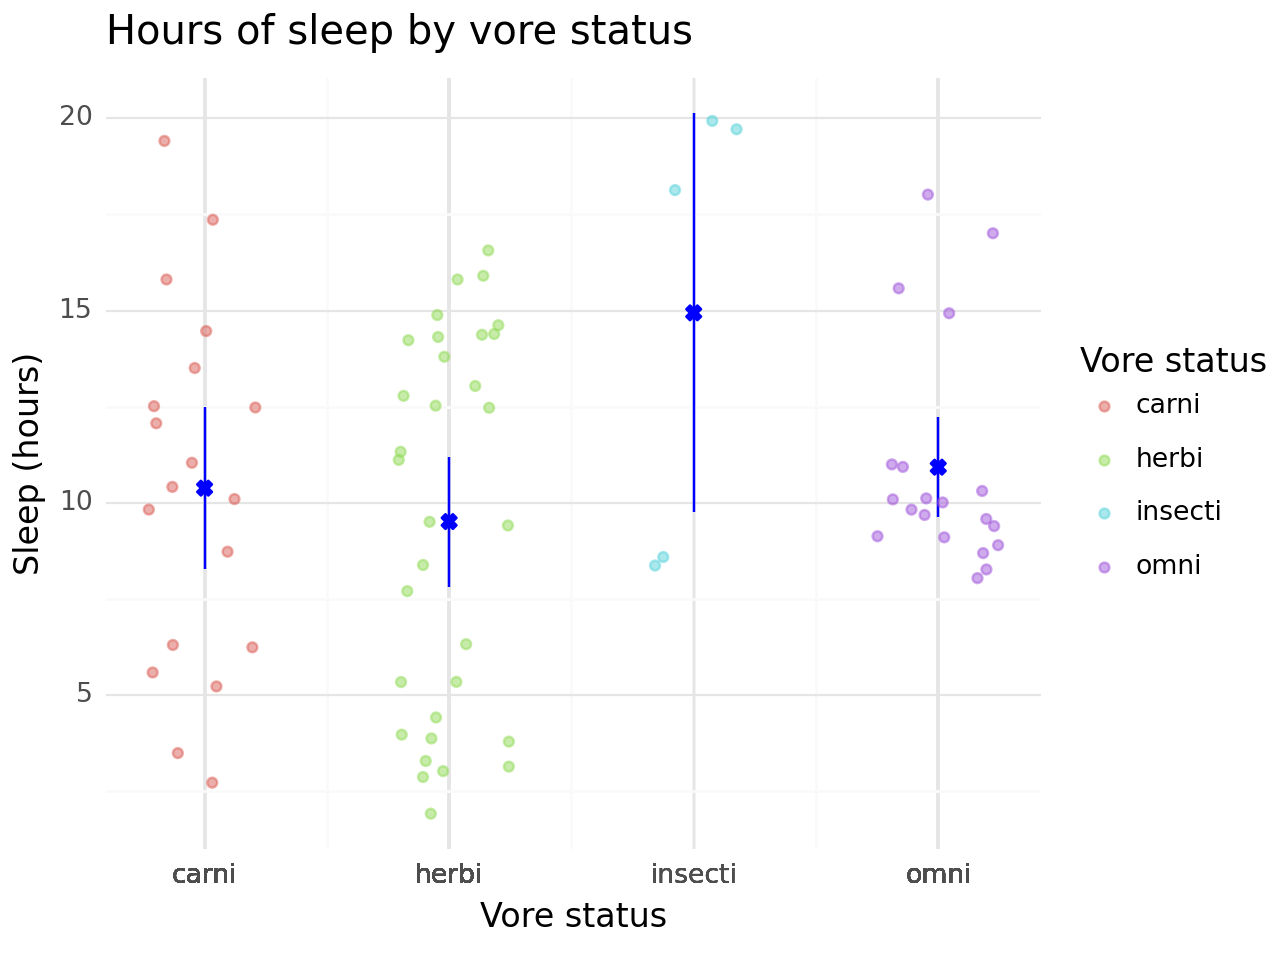

In [19]:
p += pn.theme_minimal(base_size = 12)
p.draw()

Some final thoughts on the plot above. I’d prefer the confidence intervals not be blue. The default black would probably be better, but then I wouldn’t have been able to tell you more about the keyword argument `color`.


The units of your variables show up in your plots, to inform you reader, but do now show up in your variable names.



The categories for `vore` should be changed. Using abbreviations in your writing and/or plots is usually not helpful to anyone but you. There are ways to change the categories through plotnine, instead of by changing your DataFrame. I don’t recommend this. There’s little to no reason to use abbreviations for label names.



Some people would have reached for `geom_errorbar` before `geom_linerange`. The difference is a pair of horizontal lines on the top and bottom of the confidence intervals. I see the appeal of this, but prefer the minimalism of `geom_linerange`.



For a hot minute, people were debating whether or not standard deviations or standard errors were better, when drawing lines extending from a mean as we have done here. The correct answer is it depends. If you want to talk about means across groups, then use standard errors. If you want to talk about population distributions across groups, then your data should at least be roughly symmetric, and then use standard deviations. If on the other hand you want to show off your plotting skills, use both.

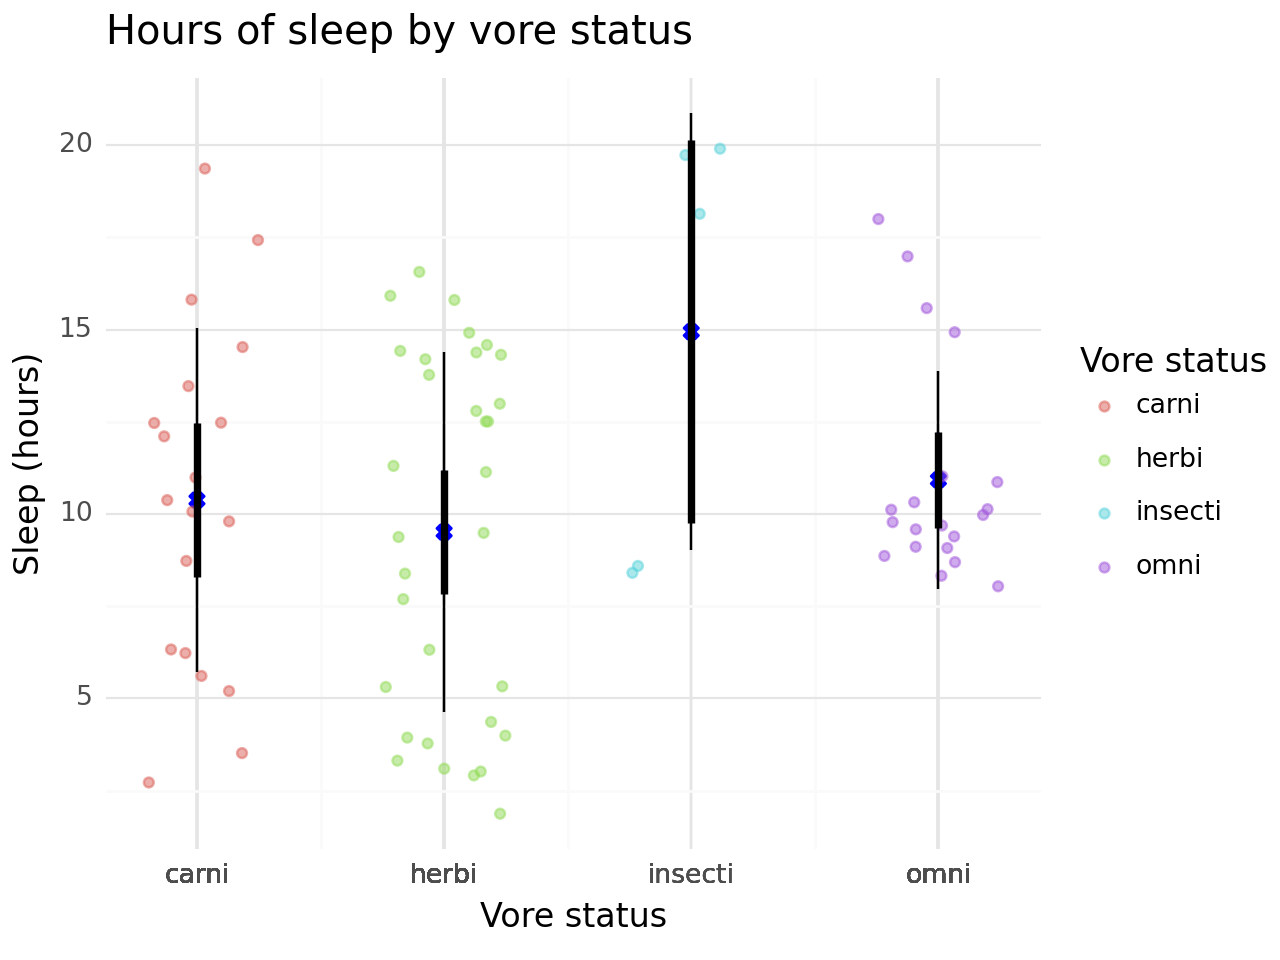

In [20]:
odf["sd_ub"] = odf["mean"] + odf["sd"]
odf["sd_lb"] = odf["mean"] - odf["sd"]

p = (p + pn.geom_linerange(pn.aes(x = odf["vore"].cat.codes, ymin = "lb", ymax = "ub"), size = 1.5)
    + pn.geom_linerange(pn.aes(x = odf["vore"].cat.codes, ymin = "sd_lb", ymax = "sd_ub")))
p.draw()

## Your own data

In this section, we'll learn about where/how files, such as a dataset,
are stored on your computer and how to properly enter data into a
spreadsheet for later data analyses.  We begin with understanding
**file paths**.  File paths are not Python specific.  A file path is
like the URL of a specific file on your computer.  Each file on your
computer has an address and that address is called a file path.

 So far we’ve relied on a dataset that already exists on your machine. The main reason behind this is that file paths can be confusing at first. And so we’ve delayed this topic until near the end. Invariably, though, you will need to load our own dataset.

### directories

All computers organize their files in **directories**, which are sometimes called `folders`. Think of a directory as a specific drawer in which logically grouped files go.



Whenever you login to a computer, you should imagine that you are immediately (as if standing) within one of the many directories of that machine. Whichever directory you are currently in is called the **current working directory**. Sometimes the current working directory is abbreviated cwd or even just wd. The current working directory is written `..`


From the current working directory, you can move up or down the directory hierachry. Which is to say directories can contain other directories, and chances are good the current working directory is located within another directory. The root of the directory tree is called the `root directory`.


Each user on a computer has their own directory, which is a (not necessarily immediate) child of the root directory. Such a directory, unique to each user of a computer, is called their **home directory**.




Every file and every folder on a computer has exactly one parent directory. The parent directory is spelled `..`.

The command `pwd` prints the (current) working directory. All Colab notebooks start with you in the content directory, that is to say the directory content is the default current working directory for all Colab notebooks.

#### visualizing directory structure

> There are many different ways to visualize directory structure. On a Mac, the application Finder, and on Windows machines File Explorer, both help users navigate files and directory structure. A more ~~basic~~ traditional way to visualize directory structure is with the command `tree`.
>
> From a Colab notebook, one can access the remote computer, on which the notebook is running, by prepending an appropriate command with `!`, read as bang. The command `pwd` prints the current working directory. The command `tree` prints the directory structure below its one argument, a file path.
>
> For instance, the command `tree .`, where `.` represents the current working directory, will print the contents of the current working directory all the way down to the children files contained within any and all sub-directories.
>
> `tree` indents sub-directories and contained files relative to their parent directory. In addition to indents, `tree` makes use of vertical and horizontal lines to help your eye better visualize where the directory boundaries are.



In [21]:
!pwd

/content


In a Colab notebooks content directory, there is a directory called sample_data. The child directory sample_data contains some data files that we have not and will not touch. Nonetheless, we can look at them. Use the command `tree .` to print the contents of the current directory you are in.

In [22]:
!tree .

.
├── math131
│   ├── data
│   │   ├── bike.csv
│   │   └── bike.csv.1
│   └── week04
└── sample_data
    ├── anscombe.json
    ├── california_housing_test.csv
    ├── california_housing_train.csv
    ├── mnist_test.csv
    ├── mnist_train_small.csv
    └── README.md

4 directories, 8 files


Try running the command `tree` on just the directory `math131`.

In [23]:
!tree math131

math131
├── data
│   ├── bike.csv
│   └── bike.csv.1
└── week04

2 directories, 2 files


### file path

> Every directory on a computer is referenced by a file path (an address). Directories are separated by a forward slash `/`, as is each file name. Imagine a dataset named `bike.csv` contained in a series of directories `math131` and `data`. Such a file would have file path `./math131/data/bike.csv`. This file path tells us that we are in a directory `.`, which contains a directory named `math131`. The directory `math131` itself contains a directory named `data`, and the directory `data` contains a file named `bike.csv`. We will learn about the file extension `.csv` in the next sub-section.

File paths that begin with `.` or `.. ` are called **relative file paths**. Such file paths are relative to the current working directory. File paths that begin with the root directory are called **absolute file paths**. For the most part, we will encourage use of relative file paths.

At the top of this notebook, I loaded a dataset named `bike.csv` into the directories `./math131/data/`.  Write some Python code to use the package Pandas to read in the `bike.csv` dataset into an appropriately named variable.  The variable type created by the Pandas function `pd.read_csv` is a `DataFrame`.

In [24]:
df = pd.read_csv("./math131/data/bike.csv")

In [25]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


* csv means comma, separated, values

*   tsv menas tab, separated, values




### delimited files

We next look at the ways in which most small to medium sized datasets are organized. Any larger datasets should use a database and databases are beyond this course. Consider the following table of data.

type   |  size   |    color

----

trouser |  6 |  black

---

dress |  8 |  blue

---

sneaker |  7 |  silver

---


ankle boot |  8 |  brown

---

coat |  44 |  green


---



sandal |  9 |  black

---

A table of data is often called **tabular data**. Tabular data are organized in rows and columns. Each row is an observation, or separate unit of analysis, and each column is a variable. Variable names show up in the first, or zero-th row, and the data are in all subsequent rows.

Such a dataset is often stored in a **delimited file**. Within a row, a delimited file separates, or delimits, each variable’s value with a special character. The most common delimiters are comma , or some amount of white space, a single space ` `, or a tab spelled `\t` and often written as visually equivalent to four or eight spaces. Each has its own faults. The world has mostly settled on comma separated values, hence `.csv` file extensions.

Comma separated values would list in a text file the row for trouser as `trouser,6,black`. A file of tabular data such as this would have file extention `.csv`, which helps quickly identify the type of file. In a .csv file, the entire table of data above would look as follows.

`type,size,color`

`trouser,6,black`

`dress,8,blue`

`sneaker,7,silver`


`ankle boot,8,brown`


`coat,44,green`


`sandal,9,black`

There are some simple problems with csv files. Imagine a dataset that contains as values sentences, specifically sentences which possibly contain commas. Here’s an example: `For instance, this sentence.`. To avoid the comma within a variable’s value being conflated with a delimiting comma, people have started surrounding individual variable values with double quotes. Double quotes is not the only choice, but it is the common choice for a quote character.

Now imagine a dataset that contains as values strings with double quotes in them. There’s solutions to this problem, too: escape characters. The most common espace character is a back slash `\`.

As you can see, in extreme cases csv files are challenging to get right. So are tab delimited files, `.tsv`, for similar reasons. We generally rely spreadsheet software and mature programming packages, like the Python package Pandas, to simplify our lives for writing and reading delimited files..

The Python package Pandas function named `read_csv` should be used to read in your own data. The function `read_csv` defaults to a comma as delimiter, double quotes as quote character, and back slash \ as an escape character. It is thus your job to get your data into a csv file appropriately. The easiest solution is to type your data into a spreadsheet and then export your spreadsheet data into csv format.

### read in your own data

This whole section is prep-work. Once you understand file paths and have entered your data into a delimeted file structure (.csv, .tsv, or otherwise), the Python package Pandas makes reading in the data relatively simple. The code below is an example of reading in a .csv file into a DataFrame, just as we worked with beginning in Week 01.



In [27]:
# df = pd.read_csv("./path/to/your/data.csv")

#### your data in a Google Colab notebook

When dealing with your own data while working in a Google Colab notebook, you have to remember that the computer on which your notebook runs is not the computer in front of you. This means, to read data into Python, you need to upload any dataset onto the Colab notebook computer.

To upload a dataset to the notebook computer, click on the folder looking icon, folder, near the top left of the Colab notebook within your browser. Confusingly, the tooltip you get when hovering over the folder icon reads Files. Then click the upload file icon, upload_file, to upload the dataset you want.

Let’s say the file you uploaded is named `research_data.csv`. If upload your dataset into the current working directory on the notebook computer, then the file path will be `./research_data.csv`, and the code to read this file into Python, using Pandas, is

`df = pd.read_csv("./research_data.csv")`

If, before uploading your dataset, you created a new directory named `data`, and then you uploaded `research_data.csv` into the directory `data`, the file path will be `./data/research_data.cs`v, and the code to read this file into Python, using Pandas, is

`df = pd.read_csv("./data/research_data.csv")`